##  Section -4 USA Oil Exports  And  USA TOp Oil Company Data Analysis

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## USA Oil Exports

In [48]:
usa_exports = pd.read_csv(r"D:\Projects\Russia India Oil Trade\USA Data phase -5/US_Crude_Oil_Exports_With_Profits_2022-2025.csv")

In [49]:
usa_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Month                             44 non-null     object 
 1   Year                              44 non-null     int64  
 2   Million Barrels                   44 non-null     float64
 3   Total Export Value (Million USD)  44 non-null     float64
 4   USA_Brent Crude Price (USD/bbl)   44 non-null     float64
 5   Profits (USD Million)             44 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 2.2+ KB


In [50]:
usa_exports.columns

Index(['Month', 'Year', 'Million Barrels', 'Total Export Value (Million USD)',
       'USA_Brent Crude Price (USD/bbl)', 'Profits (USD Million)'],
      dtype='object')

Converting to Proper DateTime Format

In [51]:
usa_exports["Month_year"] = pd.to_datetime(usa_exports["Month"] + " " + usa_exports["Year"].astype(str),
                                           format='%B %Y')

#### EDA -USA Oil Exports

USA Oil Exports Value, Profit and QUantity by Year (2022- 2025) - Line Chart

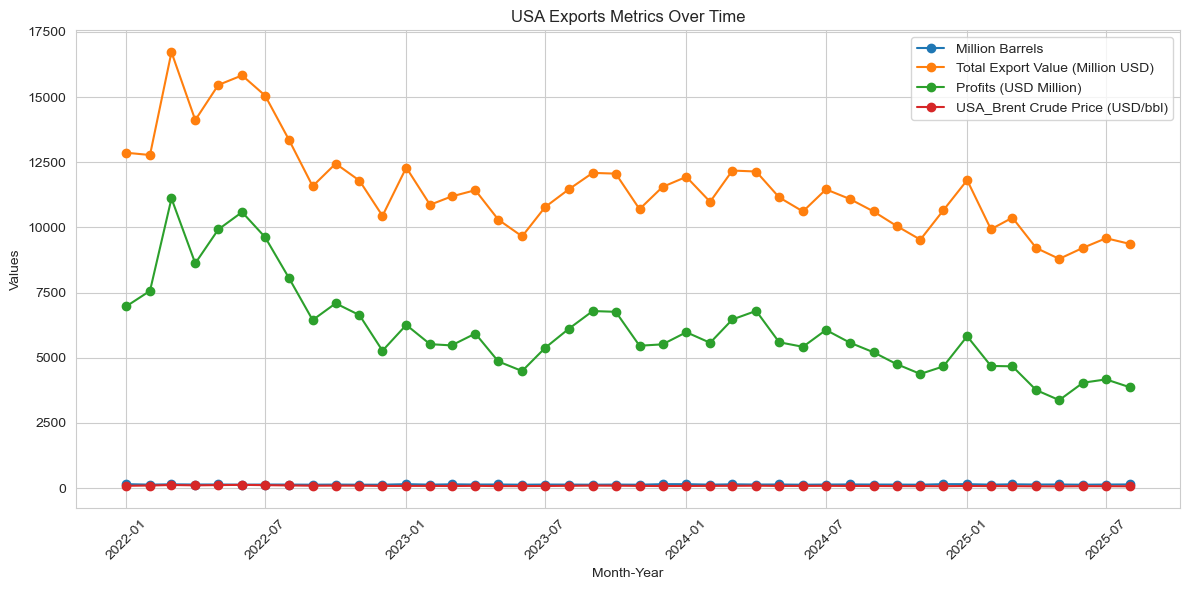

In [52]:
import matplotlib.pyplot as plt

# Columns to plot (exclude Month_year)
cols_to_plot = ['Million Barrels', 'Total Export Value (Million USD)', 'Profits (USD Million)','USA_Brent Crude Price (USD/bbl)']

fig, ax = plt.subplots(figsize=(12,6))

# Loop over columns
for i, col in enumerate(cols_to_plot):
    ax.plot(usa_exports['Month_year'], usa_exports[col], marker='o', label=col)

# Customize the chart
ax.set_title("USA Exports Metrics Over Time")
ax.set_xlabel("Month-Year")
ax.set_ylabel("Values")
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight - Chart Shows Quantity almost remain same, But, Profits  and Dynamic Due to change in Oil Price

#### Other Way - Without melting data 

Monthly Data of all Metrics

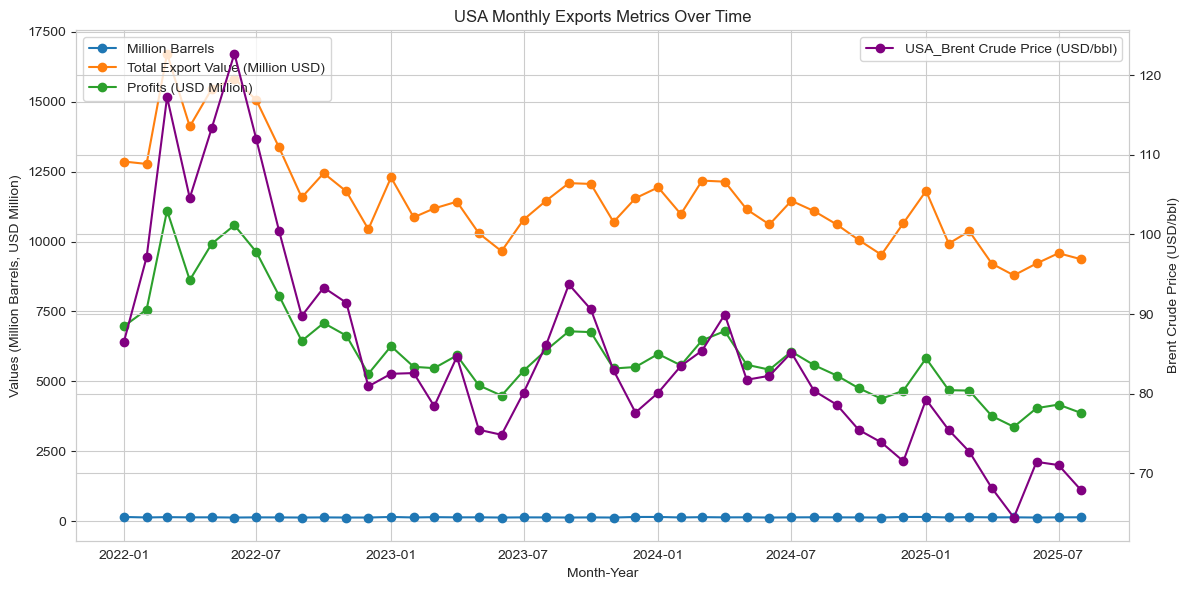

In [53]:
import matplotlib.pyplot as plt

cols_to_plot = ['Million Barrels', 'Total Export Value (Million USD)', 'Profits (USD Million)', 'USA_Brent Crude Price (USD/bbl)']

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot main metrics on primary y-axis
for col in cols_to_plot[:-1]:  # Exclude Brent price
    ax1.plot(usa_exports['Month_year'], usa_exports[col], marker='o', label=col)

# Create secondary y-axis for Brent price
ax2 = ax1.twinx()
ax2.plot(usa_exports['Month_year'], usa_exports['USA_Brent Crude Price (USD/bbl)'], marker='o', label='USA_Brent Crude Price (USD/bbl)', color='purple')

# Customize the chart
ax1.set_title("USA Monthly Exports Metrics Over Time")
ax1.set_xlabel("Month-Year")
ax1.set_ylabel("Values (Million Barrels, USD Million)")
ax2.set_ylabel("Brent Crude Price (USD/bbl)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

USA Exports,Profit, Global and USA Crude Oil Price ByYear (2022-2025)  - Clustered Chart


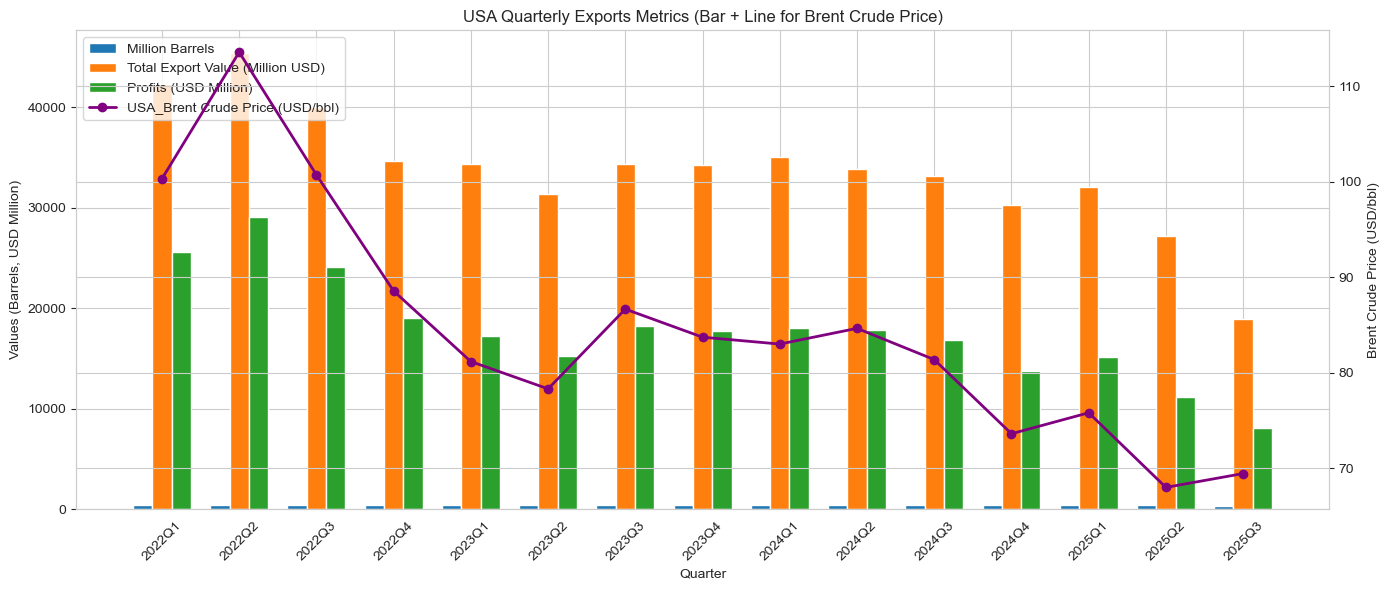

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Create a 'Quarter' column ---
usa_exports['Quarter'] = usa_exports['Month_year'].dt.to_period('Q').astype(str)

# --- Step 2: Aggregate quarterly data ---
quarterly_data = usa_exports.groupby('Quarter').agg({
    'Million Barrels': 'sum',
    'Total Export Value (Million USD)': 'sum',
    'Profits (USD Million)': 'sum',
    'USA_Brent Crude Price (USD/bbl)': 'mean'
}).reset_index()

# --- Step 3: Bar chart with dual y-axis ---
cols_left = ['Million Barrels', 'Total Export Value (Million USD)', 'Profits (USD Million)']
col_right = 'USA_Brent Crude Price (USD/bbl)'

fig, ax1 = plt.subplots(figsize=(14,6))

# Plot grouped bar chart for left-axis metrics
bar_width = 0.25
x = range(len(quarterly_data['Quarter']))

for i, col in enumerate(cols_left):
    ax1.bar(
        [p + i*bar_width for p in x],
        quarterly_data[col],
        width=bar_width,
        label=col
    )

ax1.set_xlabel("Quarter")
ax1.set_ylabel("Values (Barrels, USD Million)")
ax1.set_xticks([p + bar_width for p in x])  # center ticks
ax1.set_xticklabels(quarterly_data['Quarter'], rotation=45)
ax1.grid(True, axis="y")

# Secondary y-axis for Brent Crude Price (line on top of bars)
ax2 = ax1.twinx()
ax2.plot(
    [p + bar_width for p in x],
    quarterly_data[col_right],
    marker='o',
    color='purple',
    label=col_right,
    linewidth=2
)
ax2.set_ylabel("Brent Crude Price (USD/bbl)")

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title("USA Quarterly Exports Metrics (Bar + Line for Brent Crude Price)")
plt.tight_layout()
plt.show()


USA Exports Data -Quaterly

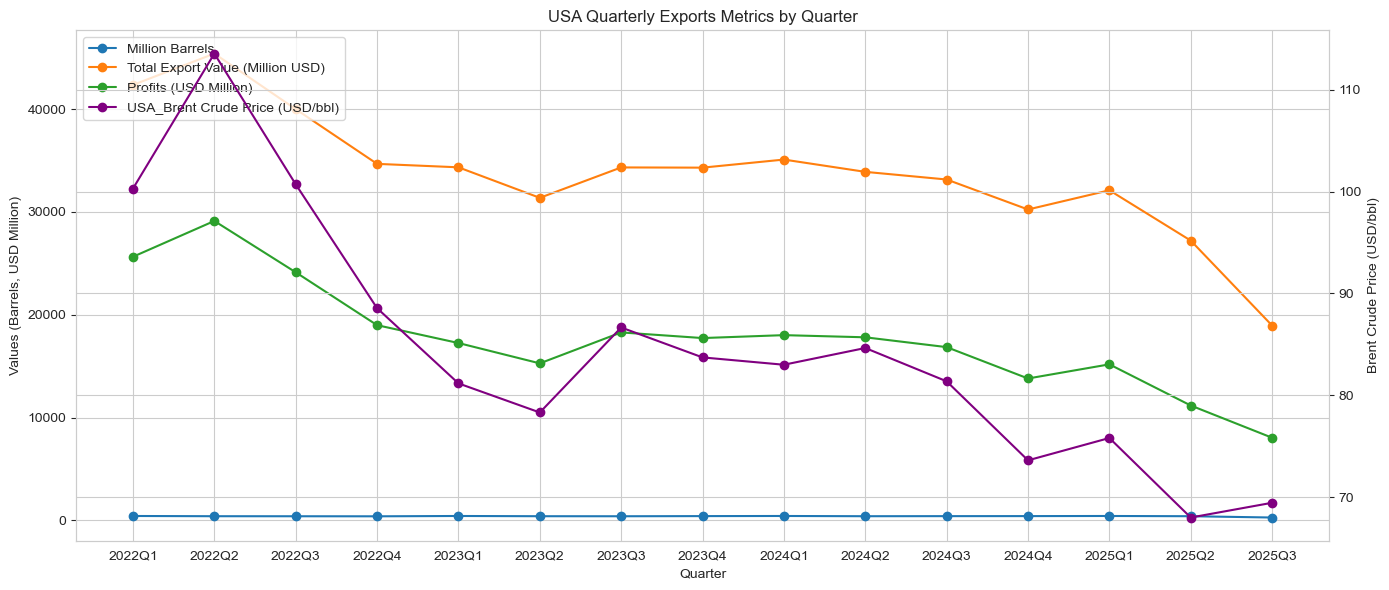

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Create a 'Quarter' column ---
usa_exports['Quarter'] = usa_exports['Month_year'].dt.to_period('Q').astype(str)

# --- Step 2: Aggregate quarterly data ---
quarterly_data = usa_exports.groupby('Quarter').agg({
    'Million Barrels': 'sum',
    'Total Export Value (Million USD)': 'sum',
    'Profits (USD Million)': 'sum',
    'USA_Brent Crude Price (USD/bbl)': 'mean'
}).reset_index()

# --- Step 3: Dual y-axis line chart ---
cols_left = ['Million Barrels', 'Total Export Value (Million USD)', 'Profits (USD Million)']
col_right = 'USA_Brent Crude Price (USD/bbl)'

fig, ax1 = plt.subplots(figsize=(14,6))

# Plot left-axis metrics
for col in cols_left:
    ax1.plot(quarterly_data['Quarter'], quarterly_data[col], marker='o', label=col)
ax1.set_xlabel("Quarter")
ax1.set_ylabel("Values (Barrels, USD Million)")
ax1.grid(True)

# Create secondary y-axis for Brent Crude Price
ax2 = ax1.twinx()
ax2.plot(quarterly_data['Quarter'], quarterly_data[col_right], marker='o', color='purple', label=col_right)
ax2.set_ylabel("Brent Crude Price (USD/bbl)")

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title("USA Quarterly Exports Metrics by Quarter")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


USA Export Chart for All Metrics

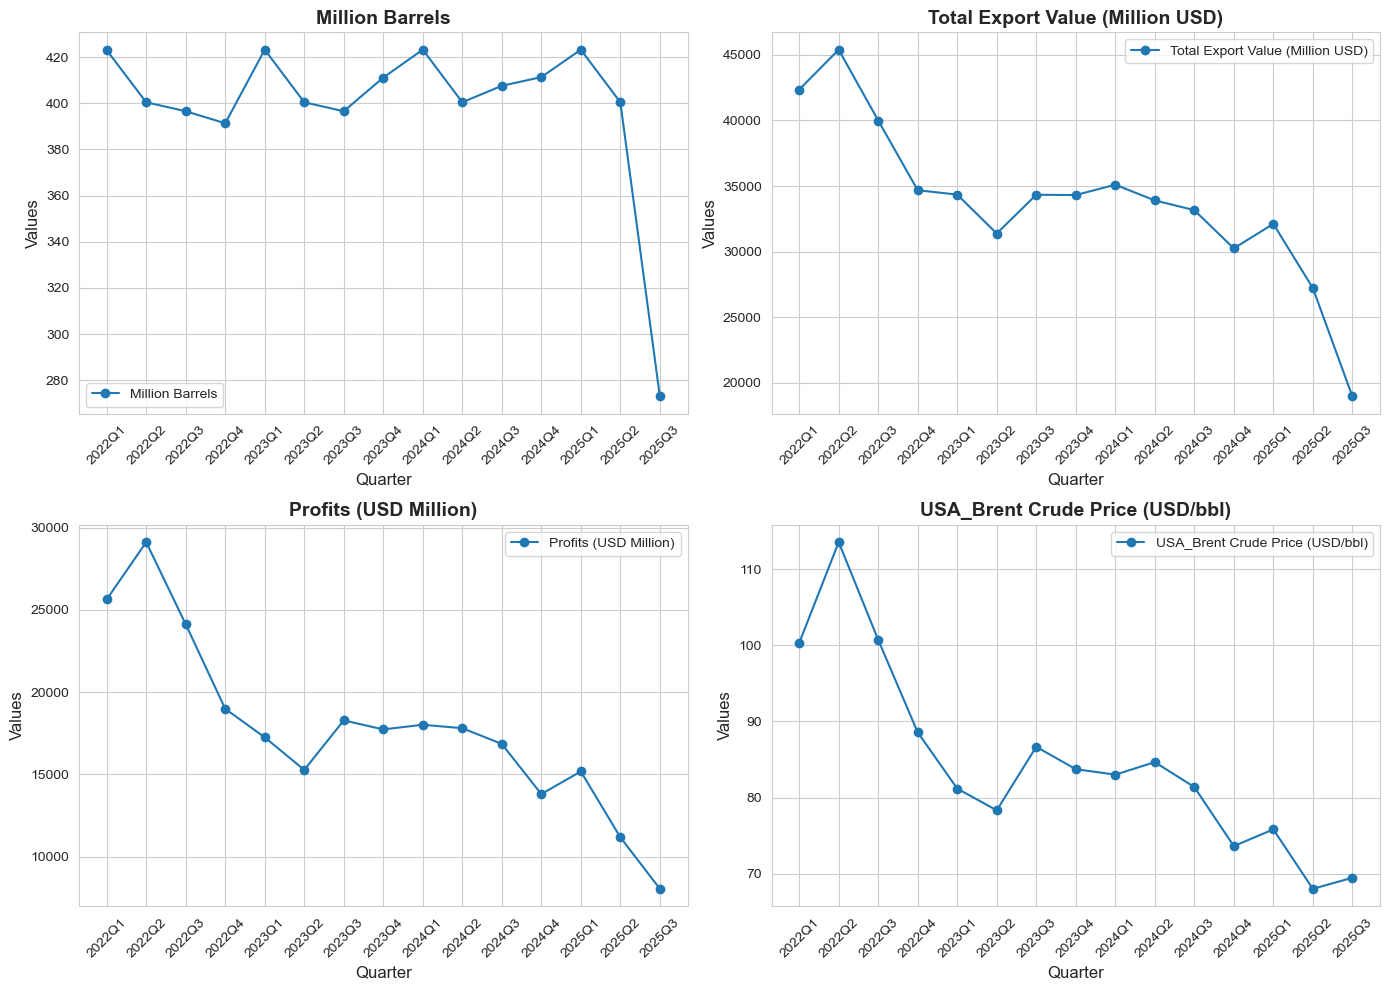

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Create 'Quarter' column ---
usa_exports['Quarter'] = usa_exports['Month_year'].dt.to_period('Q').astype(str)

# --- Step 2: Aggregate quarterly data ---
quarterly_data = usa_exports.groupby('Quarter').agg({
    'Million Barrels': 'sum',
    'Total Export Value (Million USD)': 'sum',
    'Profits (USD Million)': 'sum',
    'USA_Brent Crude Price (USD/bbl)': 'mean'
}).reset_index()

# --- Metrics to plot ---
cols_to_plot = [
    'Million Barrels',
    'Total Export Value (Million USD)',
    'Profits (USD Million)',
    'USA_Brent Crude Price (USD/bbl)'
]

# --- Step 3: Create 2x2 grid of subplots ---
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
axes = axes.flatten()

# Loop over metrics and axes
for ax, col in zip(axes, cols_to_plot):
    ax.plot(quarterly_data['Quarter'], quarterly_data[col], marker='o', label=col)
    ax.set_title(col, fontsize=14, fontweight='bold')
    ax.set_xlabel("Quarter", fontsize=12)
    ax.set_ylabel("Values", fontsize=12)
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)  # rotate x labels

plt.tight_layout()
plt.show()


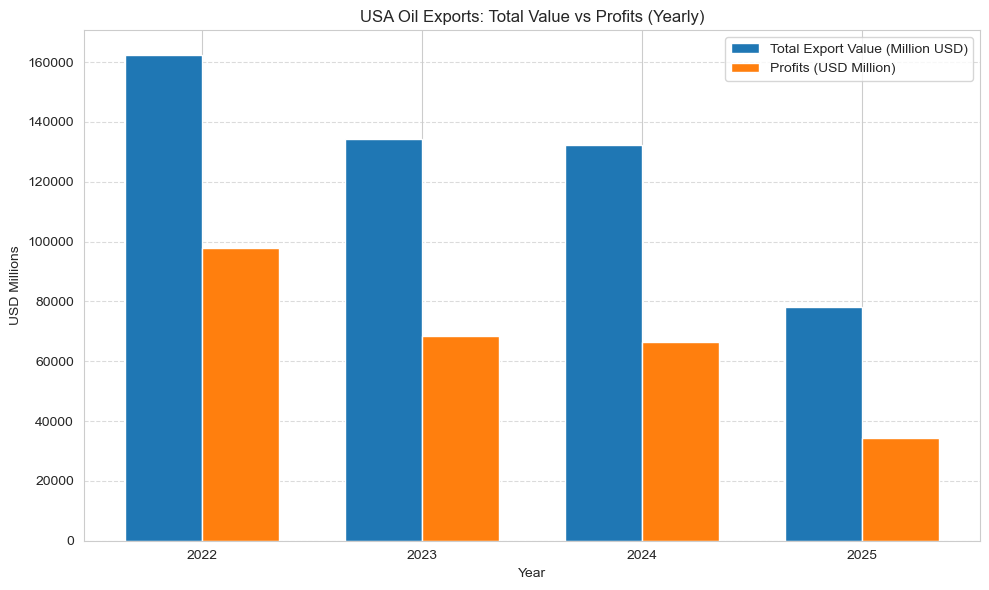

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# --- Step 1: Aggregate yearly data ---
usa_exports['Year'] = usa_exports['Month_year'].dt.year
yearly_data = usa_exports.groupby('Year').agg({
    'Total Export Value (Million USD)': 'sum',
    'Profits (USD Million)': 'sum'
}).reset_index()

# --- Step 2: Create grouped bar chart ---
x = np.arange(len(yearly_data['Year']))  # positions for bars
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

ax.bar(x - bar_width/2, yearly_data['Total Export Value (Million USD)'], 
       width=bar_width, label="Total Export Value (Million USD)")
ax.bar(x + bar_width/2, yearly_data['Profits (USD Million)'], 
       width=bar_width, label="Profits (USD Million)")

# --- Formatting ---
ax.set_xlabel("Year")
ax.set_ylabel("USD Millions")
ax.set_title("USA Oil Exports: Total Value vs Profits (Yearly)")
ax.set_xticks(x)
ax.set_xticklabels(yearly_data['Year'])
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()


## USA   - Top Oil Companies Data

In [58]:
top_oil_companies = pd.read_csv(r"D:\Projects\Russia India Oil Trade\USA Data phase -5/Final_Top Oil CompanyDAta.csv")


In [59]:
top_oil_companies.head(5)

,Period,Year,Quarter,Company Name,Net Income (USD Millions),Revenue (USD Millions)
0,Q1 (Jan-Mar),2022,Q1,ExxonMobil,"5,480","90,500"
1,Q2 (Apr-Jun),2022,Q2,ExxonMobil,"17,850","1,15,570"
2,Q3 (Jul-Sep),2022,Q3,ExxonMobil,"19,660","1,12,070"
3,Q4 (Oct-Dec),2022,Q4,ExxonMobil,"12,750","95,430"
4,Q1 (Jan-Mar),2023,Q1,ExxonMobil,"11,430","86,560"


In [60]:
top_oil_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Period                     45 non-null     object
 1   Year                       45 non-null     int64 
 2   Quarter                    45 non-null     object
 3   Company Name               45 non-null     object
 4   Net Income (USD Millions)  45 non-null     object
 5   Revenue (USD Millions)     45 non-null     object
dtypes: int64(1), object(5)
memory usage: 2.2+ KB


In [61]:
top_oil_companies.columns

Index(['Period', 'Year', 'Quarter', 'Company Name',
       'Net Income (USD Millions)', 'Revenue (USD Millions)'],
      dtype='object')

In [62]:
## Remove Commas and convert to FLoat data Type

top_oil_companies[["Net Income (USD Millions)", "Revenue (USD Millions)"]] = (
    top_oil_companies[["Net Income (USD Millions)", "Revenue (USD Millions)"]]
    .replace({",": ""}, regex=True)   # remove commas
    .astype(int)                  # convert to float
    
)



In [63]:
top_oil_companies.head()

,Period,Year,Quarter,Company Name,Net Income (USD Millions),Revenue (USD Millions)
0,Q1 (Jan-Mar),2022,Q1,ExxonMobil,5480,90500
1,Q2 (Apr-Jun),2022,Q2,ExxonMobil,17850,115570
2,Q3 (Jul-Sep),2022,Q3,ExxonMobil,19660,112070
3,Q4 (Oct-Dec),2022,Q4,ExxonMobil,12750,95430
4,Q1 (Jan-Mar),2023,Q1,ExxonMobil,11430,86560


In [64]:
top_oil_companies["Quarter_year"] = top_oil_companies["Quarter"] +" "+ top_oil_companies["Year"].astype(str)

In [65]:
Global_oil_price_Data = pd.read_csv(r"D:\Projects\Russia India Oil Trade\USA Data phase -5/Global oil_price2016 -2025.csv")

merging with GLobal Oil Price Data -for  Relation

In [66]:
Global_oil_price_Data.head(5)

,Month,Year,USA_Brent Crude Price(USD/Barrel),Global Oil Price(USD/Barrel),Unnamed: 4,Unnamed: 5,Month year
0,January,2016,30.70,31.68,NaN,NaN,January-2016
1,February,2016,32.18,30.32,NaN,NaN,February-2016
2,March,2016,38.21,37.55,NaN,NaN,March-2016
3,April,2016,41.58,40.75,NaN,NaN,April-2016
4,May,2016,46.74,46.71,NaN,NaN,May-2016


In [67]:
# Create a mapping from month names to quarters
month_to_quarter = {
    "January":"Q1", "February":"Q1", "March":"Q1",
    "April":"Q2", "May":"Q2", "June":"Q2",
    "July":"Q3", "August":"Q3", "September":"Q3",
    "October":"Q4", "November":"Q4", "December":"Q4"
}

Global_oil_price_Data["Quarter"] = Global_oil_price_Data["Month"].map(month_to_quarter)

# Create 'Quarter_year' column like your company table
Global_oil_price_Data["Quarter_year"] = Global_oil_price_Data["Quarter"] + " " + Global_oil_price_Data["Year"].astype(str)


In [68]:
Global_oil_price_Data.head(5)

,Month,Year,USA_Brent Crude Price(USD/Barrel),Global Oil Price(USD/Barrel),Unnamed: 4,Unnamed: 5,Month year,Quarter,Quarter_year
0,January,2016,30.70,31.68,NaN,NaN,January-2016,Q1,Q1 2016
1,February,2016,32.18,30.32,NaN,NaN,February-2016,Q1,Q1 2016
2,March,2016,38.21,37.55,NaN,NaN,March-2016,Q1,Q1 2016
3,April,2016,41.58,40.75,NaN,NaN,April-2016,Q2,Q2 2016
4,May,2016,46.74,46.71,NaN,NaN,May-2016,Q2,Q2 2016


In [69]:
# Use Global Oil Price for averaging (or choose USA_Brent Crude Price if preferred)
quarterly_oil_prices = (
    Global_oil_price_Data.groupby("Quarter_year")[["Global Oil Price(USD/Barrel)","USA_Brent Crude Price(USD/Barrel)"]]
    .mean()
    .reset_index()
)



In [70]:
quarterly_oil_prices.head(5)

,Quarter_year,Global Oil Price(USD/Barrel),USA_Brent Crude Price(USD/Barrel)
0,Q1 2016,33.183333,33.696667
1,Q1 2017,51.766667,53.680000
2,Q1 2018,62.886667,66.806667
3,Q1 2019,54.826667,63.170000
4,Q1 2020,45.756667,50.440000


In [71]:
top_oil_companies = top_oil_companies.merge(
    quarterly_oil_prices,
    on="Quarter_year",
    how="left"
)


In [72]:
top_oil_companies.head(5)

,Period,Year,Quarter,Company Name,Net Income (USD Millions),Revenue (USD Millions),Quarter_year,Global Oil Price(USD/Barrel),USA_Brent Crude Price(USD/Barrel)
0,Q1 (Jan-Mar),2022,Q1,ExxonMobil,5480,90500,Q1 2022,93.996667,100.296667
1,Q2 (Apr-Jun),2022,Q2,ExxonMobil,17850,115570,Q2 2022,106.633333,113.543333
2,Q3 (Jul-Sep),2022,Q3,ExxonMobil,19660,112070,Q3 2022,92.020000,100.713333
3,Q4 (Oct-Dec),2022,Q4,ExxonMobil,12750,95430,Q4 2022,81.336667,88.556667
4,Q1 (Jan-Mar),2023,Q1,ExxonMobil,11430,86560,Q1 2023,76.073333,81.173333


In [73]:
top_oil_companies.columns

Index(['Period', 'Year', 'Quarter', 'Company Name',
       'Net Income (USD Millions)', 'Revenue (USD Millions)', 'Quarter_year',
       'Global Oil Price(USD/Barrel)', 'USA_Brent Crude Price(USD/Barrel)'],
      dtype='object')

### ETL Done, Now Analysis Part

2️⃣ Plot Global Oil Prices alongside company performance

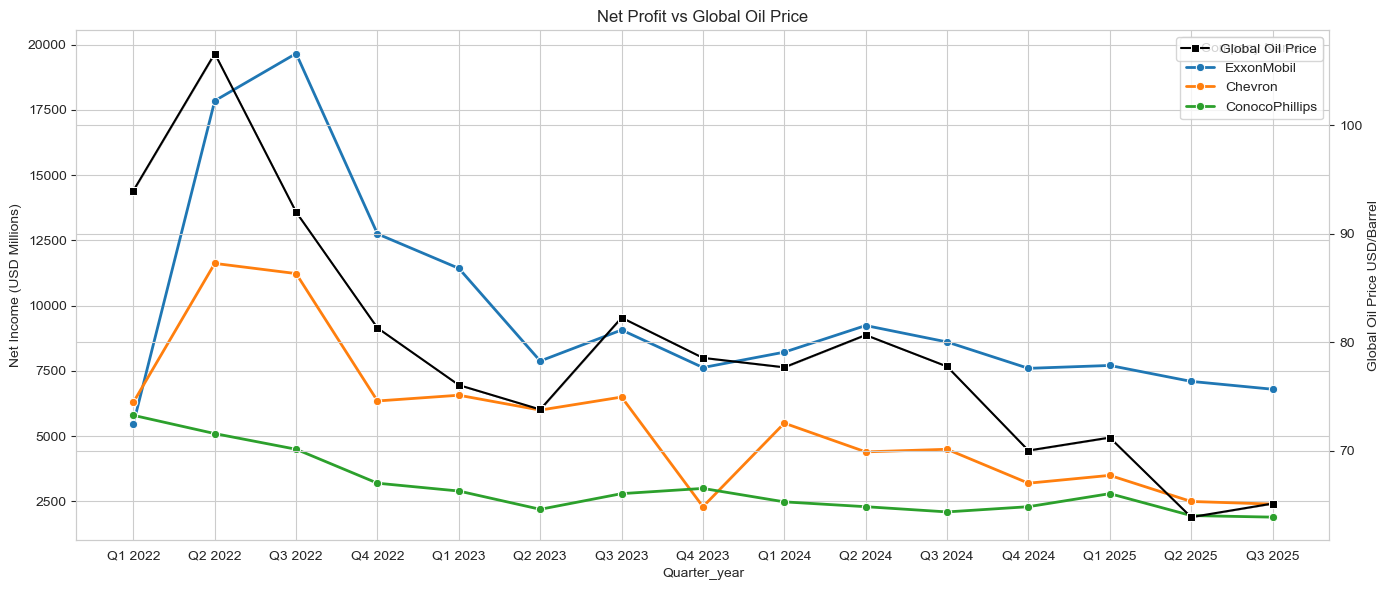

In [74]:
plt.figure(figsize=(14,6))

# Plot Net Income
sns.lineplot(
    data=top_oil_companies,
    x="Quarter_year",
    y="Net Income (USD Millions)",
    hue="Company Name",
    marker="o",
    linewidth=2
)

# Overlay Global Oil Price (secondary y-axis)
ax2 = plt.gca().twinx()
sns.lineplot(
    data=top_oil_companies,
    x="Quarter_year",
    y="Global Oil Price(USD/Barrel)",
    color="black",
    marker="s",
    label="Global Oil Price",
    ax=ax2
)

ax2.set_ylabel("Global Oil Price USD/Barrel")


# Formatting
plt.xticks(rotation=45)
plt.title("Net Profit vs Global Oil Price")

plt.tight_layout()
plt.show()


1️⃣ Correlation Heatmap  for Relation Between Oil Price and Profit

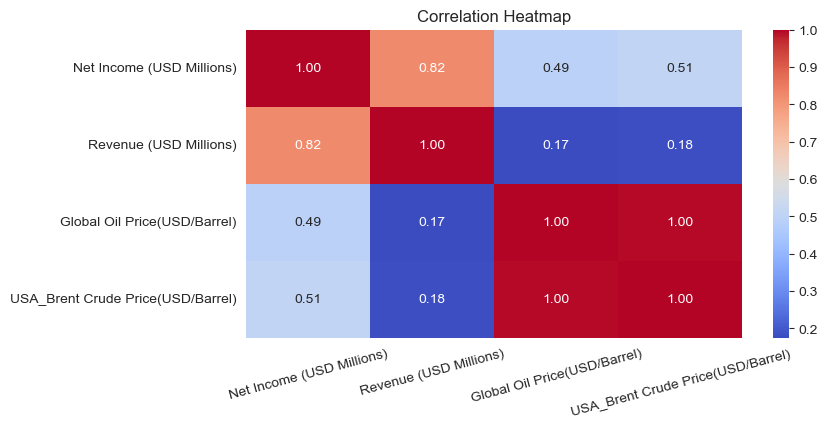

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ["Net Income (USD Millions)", 
                "Revenue (USD Millions)", 
                "Global Oil Price(USD/Barrel)", 
                "USA_Brent Crude Price(USD/Barrel)"]

plt.figure(figsize=(8,4))
sns.heatmap(top_oil_companies[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.xticks(rotation=15)
plt.show()


### Stacked Bar Chart for Net Income + Global Oil Price

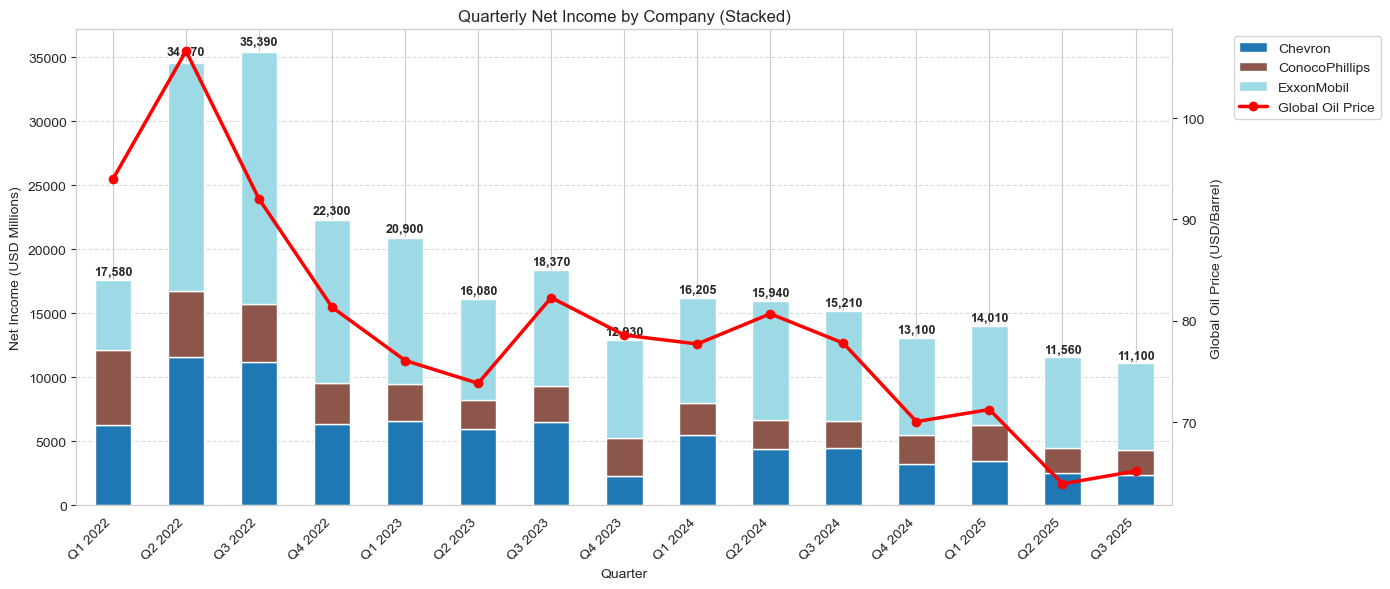

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Pivot table: Net Income per Company per Quarter ---
netincome_pivot = top_oil_companies.pivot_table(
    index="Quarter_year", 
    columns="Company Name", 
    values="Net Income (USD Millions)", 
    aggfunc="sum"
)

# Ensure chronological order
netincome_pivot = netincome_pivot.reindex(top_oil_companies["Quarter_year"].unique())

# X-axis for alignment
quarters = netincome_pivot.index

# Compute Global Oil Price per quarter
global_price = top_oil_companies.groupby("Quarter_year")["Global Oil Price(USD/Barrel)"].mean()
global_price = global_price.reindex(quarters)

# --- Plot stacked Net Income ---
fig, ax = plt.subplots(figsize=(14,6))

# Plot stacked bars
bars = netincome_pivot.plot(kind="bar", stacked=True, ax=ax, colormap='tab20')

# Formatting bars
ax.set_ylabel("Net Income (USD Millions)")
ax.set_xlabel("Quarter")
ax.set_title("Quarterly Net Income by Company (Stacked)")
ax.set_xticklabels(quarters, rotation=45, ha='right')

# Add total Net Income labels on top of each bar
totals = netincome_pivot.sum(axis=1)
for i, total in enumerate(totals):
    ax.text(
        i,                   # x-coordinate: bar position
        total + total*0.01,  # y-coordinate: slightly above the bar
        f'{int(total):,}',   # formatted label
        ha='center', va='bottom', fontsize=9, fontweight='bold'
    )

# Grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Overlay Global Oil Price line on secondary y-axis
ax2 = ax.twinx()
ax2.plot(
    quarters,
    global_price.values,
    color="red",
    marker="o",
    linewidth=2.5,
    label="Global Oil Price"
)
ax2.set_ylabel("Global Oil Price (USD/Barrel)")
ax2.grid(False)  # remove secondary axis grid

# Combine legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()


### Quarterly Revenue vs Net Income with Global Oil Price

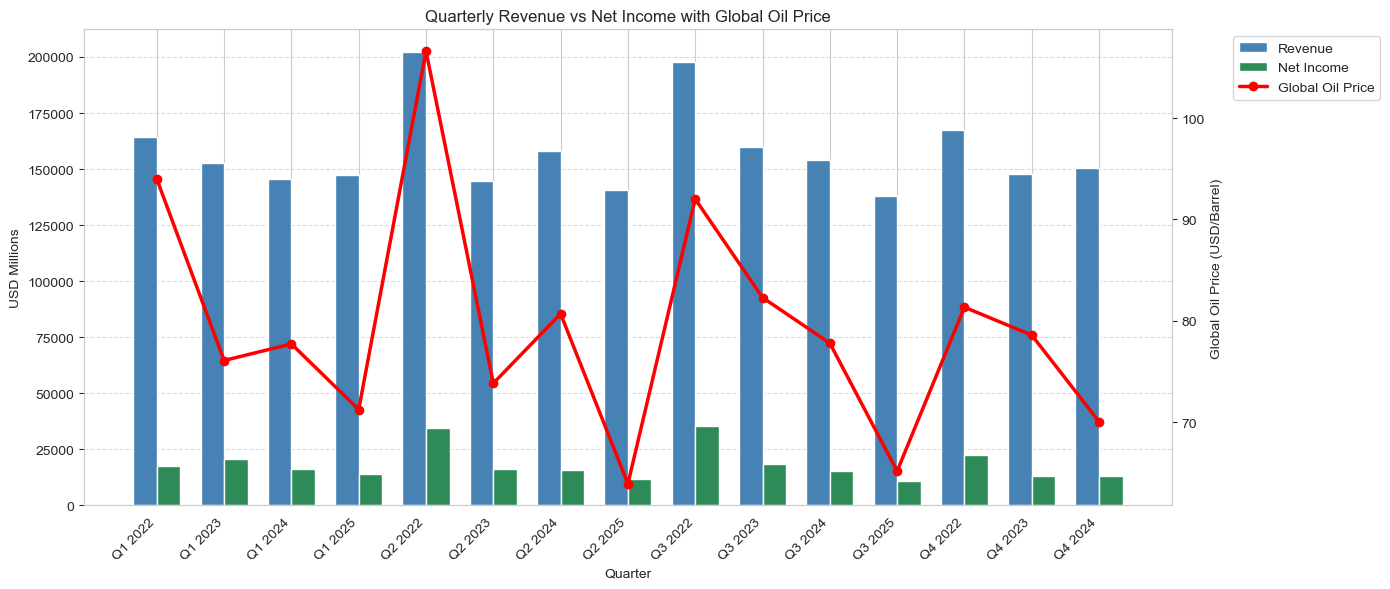

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Aggregate Revenue & Net Income per quarter ---
quarterly_data = top_oil_companies.groupby("Quarter_year").agg({
    "Revenue (USD Millions)": "sum",
    "Net Income (USD Millions)": "sum",
    "Global Oil Price(USD/Barrel)": "mean"
}).reset_index()

quarters = quarterly_data["Quarter_year"]
revenue = quarterly_data["Revenue (USD Millions)"]
net_income = quarterly_data["Net Income (USD Millions)"]
global_price = quarterly_data["Global Oil Price(USD/Barrel)"]

# --- Plot ---
fig, ax = plt.subplots(figsize=(14,6))

x = np.arange(len(quarters))  # bar positions
bar_width = 0.35              # width of bars

# Revenue bars
bars1 = ax.bar(
    x - bar_width/2, revenue, width=bar_width, label="Revenue", color="steelblue"
)

# Net Income bars
bars2 = ax.bar(
    x + bar_width/2, net_income, width=bar_width, label="Net Income", color="seagreen"
)

# Formatting
ax.set_ylabel("USD Millions")
ax.set_xlabel("Quarter")
ax.set_title("Quarterly Revenue vs Net Income with Global Oil Price")
ax.set_xticks(x)
ax.set_xticklabels(quarters, rotation=45, ha="right")

# --- Overlay Global Oil Price line on secondary y-axis ---
ax2 = ax.twinx()
ax2.plot(
    x, global_price, color="red", marker="o", linewidth=2.5, label="Global Oil Price"
)
ax2.set_ylabel("Global Oil Price (USD/Barrel)")

# --- Combine legends (bars + line) ---
bars, labels = ax.get_legend_handles_labels()
lines, line_labels = ax2.get_legend_handles_labels()
ax.legend(bars + lines, labels + line_labels, bbox_to_anchor=(1.05,1), loc="upper left")

# Grid
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax2.grid(False)

plt.tight_layout()
plt.show()


Oil Market Analysis Report (Summary)

The Russia–Ukraine war in 2022 disrupted global oil supply, pushing Brent crude prices above $100/barrel and peaking at $130 in March. US oil companies, including ExxonMobil and Chevron, saw net income rise to ~35,000 million USD in Q2-Q3 2022, with revenues spiking to ~20,000 million USD. From 2023–2025, China accounted for 40–47% and India 38% of Russia’s crude exports (~5–7 million barrels per day), stabilizing global supply and lowering prices to $70–90/barrel. Revenues adjusted to 10,000–15,000 million USD, while net income fell to ~11,000 million USD by Q3 2025. Despite steady revenue through increased sales, profits declined, highlighting the sensitivity of earnings to geopolitical events and oil price fluctuations.

## Comprehensive EDA Summary





1. Global Oil Price & Inflation

Monthly global oil price and inflation data from 2016 to 2025 were collected and converted to quarterly averages to align with corporate earnings. The analysis revealed a strong correlation between oil price spikes and inflation, particularly during major geopolitical events such as the Russia–Ukraine war, demonstrating how global supply disruptions directly influence price levels and economic indicators.

2. China Oil Imports (2016–2025)

China’s oil import data, aggregated to quarterly levels, showed consistent purchases of Russian oil over the period. Notably, during 2023–2025, China accounted for 40–47% of Russia’s crude exports. This sustained demand played a critical role in stabilizing global oil prices, despite Western sanctions on Russian oil, ensuring a steady flow in the global market.

3. Russia Energy Export Data

Analysis of Russia’s energy exports by country and energy type indicated a significant decline in shipments to Western nations after 2022, which was offset by increased exports to India and China. Together, these countries absorbed approximately 5–7 million barrels per day, helping to maintain global supply and mitigate extreme price volatility during the sanctions period.

4. USA Oil Export & Top 3 Company Data

Quarterly revenue and net income for ExxonMobil, Chevron, and ConocoPhillips from 2016–2025 were collected and merged with global oil price data. The analysis revealed that net income spiked during oil price surges, particularly in Q2–Q3 2022, while revenue remained relatively stable due to increased production and sales. As oil prices normalized post-2022, profits gradually declined despite steady revenue. Stacked column charts with Global Oil Price overlay highlighted the sensitivity of oil company earnings to geopolitical events and price fluctuations.

Key Findings

Overall, geopolitical events such as the Russia–Ukraine war have a direct impact on oil prices and company profits. India and China played a pivotal role in stabilizing the global market by continuing to import Russian oil. While oil company revenues can remain steady through higher production and sales, profits are highly sensitive to changes in prices and costs. Visualizations, including line charts and stacked bars, effectively illustrate quarterly trends, correlations, and the response of the market to supply and geopolitical dynamics.

ValueError: 'Lower right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


## US -EU Energy Exports

In [78]:
us_energy = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Data Sets/USA Energy Exports to EU.csv")

In [79]:
us_energy.head(5)

,Energy Type,Year,Value
0,LNG,2020.0,1.5
1,LNG,2021.0,5.2
2,Crude Oil,2020.0,7.0
3,Crude Oil,2021.0,15.5
4,Petroleum Products,2020.0,6.5


In [80]:
us_energy.columns

Index(['Energy Type', 'Year', 'Value'], dtype='object')

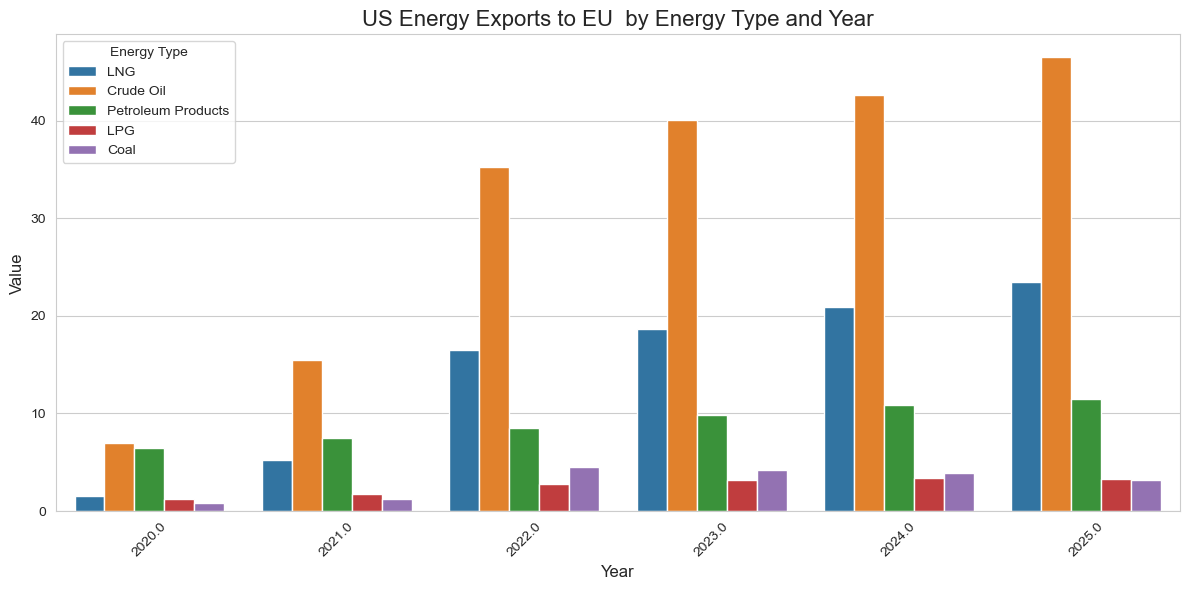

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example: us_energy DataFrame
# us_energy = pd.read_csv('your_file.csv')

# Set the style
sns.set_style("whitegrid")

# Create a grouped bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=us_energy, x='Year', y='Value', hue='Energy Type')

# Add title and labels
plt.title('US Energy Exports to EU  by Energy Type and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(title='Energy Type', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


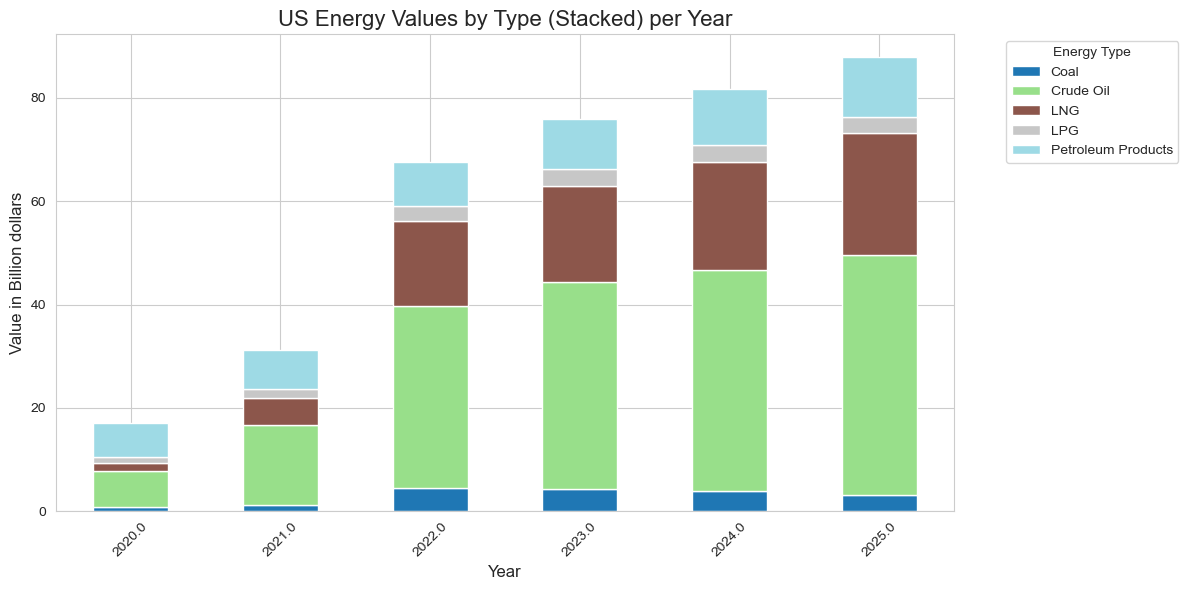

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate duplicate entries
us_energy_agg = us_energy.groupby(['Year', 'Energy Type'], as_index=False)['Value'].sum()

# Pivot the data
pivot_energy = us_energy_agg.pivot(index='Year', columns='Energy Type', values='Value')

# Plot stacked bar chart
pivot_energy.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')

# Add title and labels
plt.title('US Energy Values by Type (Stacked) per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value in Billion dollars', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Insights:
The EU’s ban on Russian oil in 2022 triggered a dramatic surge in U.S. crude and LNG exports, turning Europe into the primary destination for American energy. While growth moderated from 2023–2025, the shift established a lasting rerouting of energy flows across the Atlantic.


In [83]:
USA_imports_from_russia = pd.read_csv(r"D:\Projects\Russia India Oil Trade\Data Sets/usa imports from russia.csv")

In [84]:
USA_imports_from_russia

,Year,U.S. Imports from Russia (Goods)
0,2022,14.44
1,2023,4.57
2,2024,3.01
3,2025,2.50


In [85]:
USA_imports_from_russia.columns

Index(['Year', 'U.S. Imports from Russia (Goods)'], dtype='object')

### Chart for USA Imports from Russia  (2022- 2025)

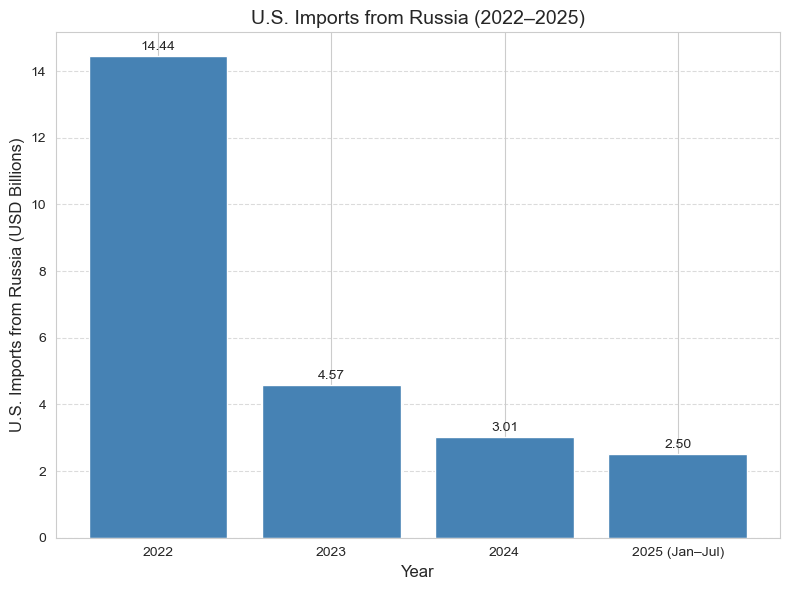

In [86]:
import matplotlib.pyplot as plt

# Data
years = ["2022", "2023", "2024", "2025 (Jan–Jul)"]
values = USA_imports_from_russia["U.S. Imports from Russia (Goods)"]

# Plot bar chart
plt.figure(figsize=(8,6))
bars = plt.bar(years, values, color="steelblue")

# Add labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("U.S. Imports from Russia (USD Billions)", fontsize=12)
plt.title("U.S. Imports from Russia (2022–2025)", fontsize=14)

# Show gridlines
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display values on top of bars
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.2, f"{val:.2f}", 
             ha="center", fontsize=10)

plt.tight_layout()
plt.show()
